In [1]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import os, shutil
from matplotlib.ticker import FuncFormatter

In [2]:
owid_df = pd.read_csv('../data/owid-covid-data.csv')

In [3]:
# fully_vax_df = pd.read_csv('../data/people-fully-vaccinated-covid.csv')
fully_vax_df = pd.read_csv('../data/new_people-fully-vaccinated-covid.csv')

In [4]:
fully_vax_df.head()

,Entity,Code,Day,people_fully_vaccinated
0,Africa,NaN,2021-02-03,5
1,Africa,NaN,2021-02-04,5
2,Africa,NaN,2021-02-05,5
3,Africa,NaN,2021-02-06,1586
4,Africa,NaN,2021-02-08,3980


In [5]:
fully_vax_df['Day'] = pd.to_datetime(fully_vax_df['Day'])

In [6]:
fully_vax_df

,Entity,Code,Day,people_fully_vaccinated
0,Africa,NaN,2021-02-03,5
1,Africa,NaN,2021-02-04,5
2,Africa,NaN,2021-02-05,5
3,Africa,NaN,2021-02-06,1586
4,Africa,NaN,2021-02-08,3980
...,...,...,...,...
4739,Zimbabwe,ZWE,2021-04-03,21327
4740,Zimbabwe,ZWE,2021-04-04,21603
4741,Zimbabwe,ZWE,2021-04-05,22056
4742,Zimbabwe,ZWE,2021-04-06,23500


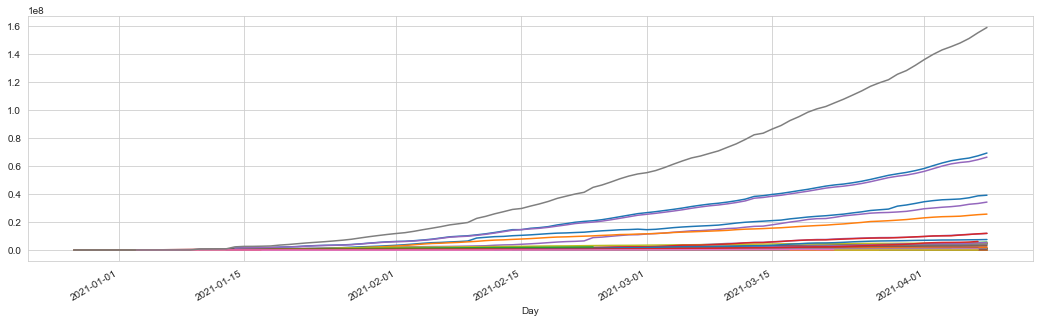

In [8]:
fig, ax = plt.subplots()
fully_vax_df.groupby('Entity').plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, legend= False, figsize= (18,5));

In [9]:
attempt = fully_vax_df.copy()

In [10]:
attempt.head()

,Entity,Code,Day,people_fully_vaccinated
0,Africa,NaN,2021-02-03,5
1,Africa,NaN,2021-02-04,5
2,Africa,NaN,2021-02-05,5
3,Africa,NaN,2021-02-06,1586
4,Africa,NaN,2021-02-08,3980


In [11]:
attempt.sort_values(by= ['people_fully_vaccinated'], ascending= False, inplace= True)

In [12]:
attempt = attempt[attempt.Entity != 'World']

In [13]:
attempt.head(15)

,Entity,Code,Day,people_fully_vaccinated
3090,North America,NaN,2021-04-08,69148012
3089,North America,NaN,2021-04-07,67156749
4523,United States,USA,2021-04-08,66203123
3088,North America,NaN,2021-04-06,65564245
3087,North America,NaN,2021-04-05,64703517
4522,United States,USA,2021-04-07,64422618
3086,North America,NaN,2021-04-04,63651477
4521,United States,USA,2021-04-06,63016976
4520,United States,USA,2021-04-05,62392065
3085,North America,NaN,2021-04-03,62062859


In [14]:
attempt.Entity.unique()

array(['North America', 'United States', 'Europe', 'Asia',
       'European Union', 'India', 'South America', 'Turkey',
       'United Kingdom', 'Brazil', 'Russia', 'England', 'Israel',
       'Germany', 'Indonesia', 'Africa', 'Chile', 'Morocco', 'Italy',
       'France', 'Spain', 'United Arab Emirates', 'Poland', 'Mexico',
       'Romania', 'Serbia', 'Hungary', 'Canada', 'Argentina', 'Greece',
       'Netherlands', 'Czechia', 'Belgium', 'Switzerland', 'Portugal',
       'Austria', 'Sweden', 'Colombia', 'Singapore', 'Scotland', 'Wales',
       'Denmark', 'Japan', 'Azerbaijan', 'Bahrain', 'Malaysia', 'Peru',
       'Norway', 'South Africa', 'Slovakia', 'Ireland', 'Cambodia',
       'Costa Rica', 'Lithuania', 'Northern Ireland', 'Hong Kong',
       'Uruguay', 'Panama', 'Bolivia', 'Slovenia', 'Jordan', 'Ecuador',
       'Bulgaria', 'Dominican Republic', 'Croatia', 'Lebanon', 'Finland',
       'Estonia', 'Malta', 'Thailand', 'South Korea', 'Philippines',
       'Cyprus', 'Northern Cyprus',

In [15]:
continents = ['North America', 'Europe', 'Asia', 'European Union', 
              'Africa', 'South America', 'World']

In [16]:
attempt = attempt[~attempt['Entity'].isin(continents)]

In [17]:
attempt.Entity.unique()

array(['United States', 'India', 'Turkey', 'United Kingdom', 'Brazil',
       'Russia', 'England', 'Israel', 'Germany', 'Indonesia', 'Chile',
       'Morocco', 'Italy', 'France', 'Spain', 'United Arab Emirates',
       'Poland', 'Mexico', 'Romania', 'Serbia', 'Hungary', 'Canada',
       'Argentina', 'Greece', 'Netherlands', 'Czechia', 'Belgium',
       'Switzerland', 'Portugal', 'Austria', 'Sweden', 'Colombia',
       'Singapore', 'Scotland', 'Wales', 'Denmark', 'Japan', 'Azerbaijan',
       'Bahrain', 'Malaysia', 'Peru', 'Norway', 'South Africa',
       'Slovakia', 'Ireland', 'Cambodia', 'Costa Rica', 'Lithuania',
       'Northern Ireland', 'Hong Kong', 'Uruguay', 'Panama', 'Bolivia',
       'Slovenia', 'Jordan', 'Ecuador', 'Bulgaria', 'Dominican Republic',
       'Croatia', 'Lebanon', 'Finland', 'Estonia', 'Malta', 'Thailand',
       'South Korea', 'Philippines', 'Cyprus', 'Northern Cyprus',
       'Seychelles', 'Kuwait', 'Gibraltar', 'Luxembourg', 'Iceland',
       'Zimbabwe', 'Bela

Entity
Albania           AxesSubplot(0.125,0.2;0.775x0.68)
Andorra           AxesSubplot(0.125,0.2;0.775x0.68)
Argentina         AxesSubplot(0.125,0.2;0.775x0.68)
Austria           AxesSubplot(0.125,0.2;0.775x0.68)
Azerbaijan        AxesSubplot(0.125,0.2;0.775x0.68)
                                ...                
United Kingdom    AxesSubplot(0.125,0.2;0.775x0.68)
United States     AxesSubplot(0.125,0.2;0.775x0.68)
Uruguay           AxesSubplot(0.125,0.2;0.775x0.68)
Wales             AxesSubplot(0.125,0.2;0.775x0.68)
Zimbabwe          AxesSubplot(0.125,0.2;0.775x0.68)
Length: 102, dtype: object

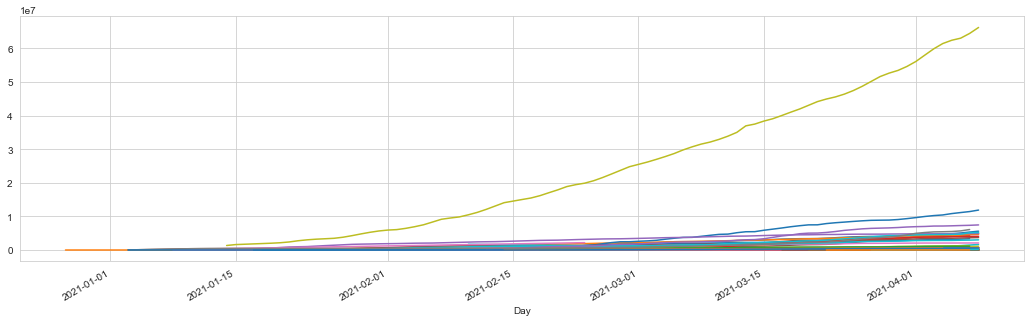

In [18]:
fig, ax = plt.subplots()
attempt.groupby('Entity').plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, 
                               figsize= (18,5), legend= False);

In [ ]:
fully_vax_df = pd.read_csv('../data/people-fully-vaccinated-covid.csv')

In [ ]:
country_incomes = pd.read_csv('../data/list-of-economies.csv', header= 4, index_col= False)
country_incomes

In [ ]:
country_incomes.columns

In [ ]:
country_incomes.isna().sum()

In [ ]:
country_incomes.drop(columns= ['Unnamed: 0', 'Other'], inplace= True)
country_incomes

In [ ]:
pd.set_option('display.max_rows', 50)

In [ ]:
country_incomes.head(40)

In [ ]:
ci2 = country_incomes.copy()

In [ ]:
ci2 = ci2.iloc[:218]

In [ ]:
ci2.tail(15)

In [ ]:
ci2.info()

In [ ]:
attempt.info()

## Merge dfs then segment by income to plot TS

In [ ]:
test2_all = pd.merge(attempt, ci2, how= 'left', on= 'Code')

In [ ]:
test2_all.info()

In [ ]:
nullval = test2_all[test2_all.isnull().any(axis= 1)]

In [ ]:
nullval.Entity.unique()

In [ ]:
test2_all

In [ ]:
test2_all['Income group'].fillna('High income', inplace= True)

In [ ]:
test2_all.info()

In [ ]:
test2_all.groupby(['Entity', 'Day'])['people_fully_vaccinated'].sum()

In [ ]:
test2_all.groupby(['Entity', 'Income group'])['people_fully_vaccinated'].plot()

In [ ]:
up_mid = test2_all[test2_all['Income group'] == 'Upper middle income']

In [ ]:
up_mid.info()

## Look at balance of income groups, which countries are in which group?

In [ ]:
sns.countplot(x = 'Income group', data= test2_all)

## Percent of population data stuff

In [ ]:
owid_df['pop_vax_percent'] = owid_df['people_fully_vaccinated'] / owid_df['population'] *100

In [ ]:
owid_df.date

In [ ]:
ow_date = owid_df[owid_df['date'] == '2021-03-20']

In [ ]:
ow_date.info()

In [ ]:
ow_perc = ow_date[ow_date['pop_vax_percent'].notna()]

In [ ]:
ow_perc.location

In [ ]:
ow_perc[ow_perc['location'] == 'World']

In [ ]:
ow_date.groupby('location')['pop_vax_percent'].plot(kind= 'bar')

## LSTM

In [20]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import os, shutil
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_rows', 55)

import math
from statsmodels.tsa.stattools import adfuller #Dickey-Fuller Test
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
from statsmodels.tools.eval_measures import rmse
import itertools

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.arima import ADFTest

from statsmodels.tsa.holtwinters import Holt

import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import warnings
warnings.filterwarnings('ignore')

In [21]:
fully_vax_df = pd.read_csv('../data/new_people-fully-vaccinated-covid.csv')
fully_vax_df['Day'] = pd.to_datetime(fully_vax_df['Day'])

In [22]:
fully_vax_ts = fully_vax_df.copy()
fully_vax_ts.set_index('Day', inplace= True)

In [23]:
world_df = fully_vax_ts.where(fully_vax_ts['Entity'] == 'World')
world_df.dropna(inplace= True)
world_df.drop(['Code', 'Entity'], axis= 1, inplace= True)

### Started here

In [ ]:
X = world_df.values

In [ ]:
y = world_df.index
y = y.strftime('%Y%m%d')
y = np.asarray(y, dtype= 'int64')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X = scaler.fit_transform(X)

# y = y.reshape(y.shape[0], 1)
# scaled_y = scaler.transform(y)

In [ ]:
# scaled_y

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size= 0.1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size= 0.1)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(32, activation= 'relu', input_shape= (X_train.shape[1], X_train.shape[2]), 
                    return_sequences= True))
lstm_model.add(LSTM(64, activation= 'relu', return_sequences= True))
lstm_model.add(LSTM(128, activation= 'relu', return_sequences= True))
lstm_model.add(LSTM(64, activation= 'relu', return_sequences= True))
lstm_model.add(LSTM(32, activation= 'relu', return_sequences= True))
# lstm_model.add(Dropout(0.5))
# lstm_model.add(Dense(6))
# lstm_model.add(Dense(1))
lstm_model.add(LSTM(1, activation= 'relu'))
lstm_model.compile(optimizer= 'Adam', loss= 'mse')

lstm_model.summary()

In [ ]:
history = lstm_model.fit(X_train, y_train, epochs= 20, batch_size= 1, validation_data= (X_test, y_test))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from numpy import newaxis
def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def plot_results(predicted_data, true_data): 
    fig = plt.figure(facecolor='white') 
    ax = fig.add_subplot(111) 
    ax.plot(true_data, label='True Data') 
    plt.plot(predicted_data, label='Prediction') 
    plt.legend() 
    plt.show() 

In [ ]:
X_test[0]

In [ ]:
predictions = predict_sequence_full(lstm_model, X_test, 1)
plot_results(predictions, y_test)

In [ ]:
y_pred = lstm_model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], 1))

print(X_test.shape)
y_pred.shape

In [ ]:
print (y_pred)
# print(X_test.)

In [ ]:
X_test_inversed = scaler.inverse_transform(X_test)

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Data')
    plt.plot(predicted, color='blue',label='Predicted Data')
    plt.title('Real vs Predicted Data')
    plt.xlabel('Days')
    plt.ylabel('People Vaccinated')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
plot_predictions(X_test_inversed, y_pred)

### Second start

In [ ]:
lstm_predictions_scaled = list()


batch = train_arr[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[lstm_pred]], axis= 1)

In [ ]:
lstm_predictions_scaled = list()
n_input = X_train.shape[0]
n_features = 1

batch = scaled_X[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(y)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[lstm_pred]], axis= 1)

In [ ]:
lstm_predictions_scaled

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

In [ ]:
plt.plot(lstm_predictions)

In [ ]:
#invert scaling for forecast
inv_ypred = np.concatenate((y_pred, X_test), axis= 1)
inv_ypred = scaler.inverse_transform(inv_ypred)
inv_ypred = inv_ypred[:, 0]

# invert scaling for actual data
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test), axis= 1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

# calculate RMSE
lstm_rmse = mean_squared_error(inv_y, inv_ypred, squared= False)
print('RMSE: {:,.2f}'.format(lstm_rmse))

In [ ]:
plt.plot(inv_y)

In [ ]:
inv_ypred

In [ ]:
plt.plot(y_pred)

### 3rd start

In [ ]:
training_set =  world_df

In [24]:
world_df

,people_fully_vaccinated
Day,
2020-12-27,137.0
2020-12-28,137.0
2020-12-29,726.0
2020-12-30,730.0
2020-12-31,847.0
...,...
2021-04-04,145021166.0
2021-04-05,147595945.0
2021-04-06,150826834.0


In [26]:
training_set, testing_set = train_test_split(world_df, test_size= 0.1)

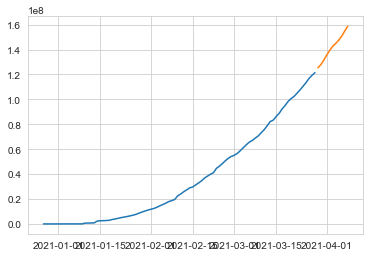

In [27]:
plt.plot(training_set)
plt.plot(testing_set)

In [28]:
mm_scaler = MinMaxScaler()
train_set_scaled = mm_scaler.fit_transform(training_set)

In [29]:
train_set_scaled

array([[0.00000000e+00],
       [0.00000000e+00],
       [4.85121061e-06],
       [4.88415601e-06],
       [5.84780906e-06],
       [5.84780906e-06],
       [7.62686083e-06],
       [1.88843051e-04],
       [1.88859523e-04],
       [1.89048960e-04],
       [1.89057196e-04],
       [2.07012441e-04],
       [2.25000631e-04],
       [2.40633224e-04],
       [5.39159759e-03],
       [5.72141402e-03],
       [6.14893004e-03],
       [6.79157955e-03],
       [1.85362698e-02],
       [2.11655354e-02],
       [2.14302352e-02],
       [2.23856684e-02],
       [2.37754949e-02],
       [2.90330706e-02],
       [3.24417997e-02],
       [3.70286482e-02],
       [4.15064968e-02],
       [4.51177742e-02],
       [4.87614616e-02],
       [5.29496542e-02],
       [5.75468558e-02],
       [6.31196202e-02],
       [7.08550773e-02],
       [7.82806746e-02],
       [8.49416833e-02],
       [9.12810707e-02],
       [9.68781488e-02],
       [1.01874163e-01],
       [1.09854099e-01],
       [1.19333052e-01],


In [30]:
def create_train_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [32]:
window_size = 1
train_X, train_y = create_dataset(train_set_scaled, window_size)
# test_X, test_y = create_dataset(testing_set, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
# test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(90, 1)
New training data shape:
(90, 1, 1)


In [34]:
train_y.shape

(90,)

In [35]:
test_X, test_y = create_dataset(testing_set, window_size)
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

TypeError: '(slice(0, 1, None), 0)' is an invalid key

In [36]:
len(testing_set)

11

In [44]:
sc = MinMaxScaler(feature_range=(0,1))
def load_data(datasetname, column, seq_len, normalise_window):
    # A support function to help prepare datasets for an RNN/LSTM/GRU
    data = datasetname.loc[:,column]

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        #result = sc.fit_transform(result)
        result = normalise_windows(result)

    result = np.array(result)

    #Last 10% is used for validation test, first 90% for training
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    # A support function to normalize a dataset
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of <prediction_len> steps before shifting prediction run forward by <prediction_len> steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

def plot_results(predicted_data, true_data): 
    fig = plt.figure(facecolor='white') 
    ax = fig.add_subplot(111) 
    ax.plot(true_data, label='True Data') 
    plt.plot(predicted_data, label='Prediction') 
    plt.legend() 
    plt.show() 
    
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()


In [38]:
window = 1
feature_train, label_train, feature_test, label_test = load_data(world_df, 
                                                                 'people_fully_vaccinated', 
                                                                 window, False)

In [48]:
x_train

NameError: name 'x_train' is not defined

In [39]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(feature_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

print (model.summary())

model compiled
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 1, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
model.fit(feature_train, label_train, batch_size=1, epochs=20, 
          validation_data = (feature_test, label_test))

Epoch 1/20
91/91 [==============================] - 1s 7ms/step - loss: 2766733643350016.0000 - val_loss: 19724390346260480.0000
Epoch 2/20
91/91 [==============================] - 0s 2ms/step - loss: 2766732838043648.0000 - val_loss: 19724388198776832.0000
Epoch 3/20
91/91 [==============================] - 0s 2ms/step - loss: 2766732838043648.0000 - val_loss: 19724383903809536.0000
Epoch 4/20
91/91 [==============================] - 0s 2ms/step - loss: 2766731227430912.0000 - val_loss: 19724383903809536.0000
Epoch 5/20
91/91 [==============================] - 0s 2ms/step - loss: 2766730958995456.0000 - val_loss: 19724383903809536.0000
Epoch 6/20
91/91 [==============================] - 0s 2ms/step - loss: 2766730958995456.0000 - val_loss: 19724379608842240.0000
Epoch 7/20
91/91 [==============================] - 0s 2ms/step - loss: 2766730422124544.0000 - val_loss: 19724379608842240.0000
Epoch 8/20
91/91 [==============================] - 0s 2ms/step - loss: 2766730690560000.0000 - v

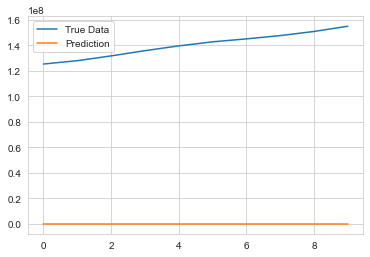

In [45]:
predictions= predict_sequence_full(model, feature_test, window)
plot_results(predictions,label_test)

# Excess / Notes:

In [ ]:
attempt = attempt[attempt.Entity != ['North America', 'Europe', 'Asia','European Union', 'Africa']]
attempt = attempt[attempt.Entity != 'World']

In [ ]:
attempt = attempt.query('Entity' != ['North America', 'South America', 'Europe', 'Asia','European Union', 'Africa'])

In [ ]:
desired = [i for i in attempt.Entity if i not in continents]

In [ ]:
desired

In [ ]:
test_all = pd.merge(attempt, ci2, left_on = 'Entity', right_on= 'Economy', copy= True)

In [ ]:
testing_all = pd.merge(attempt, ci2, how= 'left', left_on = 'Entity', right_on= 'Economy')

In [ ]:
testing_all.info()

In [ ]:
testing_all[testing_all.isnull().any(axis=1)]